# Analysing the movie ratings on Fandango.com

In October 2015, data journalist Walt Hickey analysed movie ratings and discovered strong evidence to suggest that Fandango's rating system was biased. He compared the visible user ratings to the ones he scrapped from the HTML and noticed some discrepancy. He published the full article here: https://fivethirtyeight.com/features/fandango-movies-ratings/


In this Project, I want to analyse more recent movie ratings data to determine whether there has been any change in Fandango's rating after Hickey's analysis.

**************************************************************
<b>Comments</b><br>
1. DATA SOURCE?
2. LINK TO BOTH DATA YOU WILL BE USING?

#### Examining and loading the data into a Pandas DataFrame

In [1]:
import pandas as pd 
import numpy as np

# Reading the datasets
fandango_1415 = pd.read_csv('fandango_score_comparison.csv') # Dataset that Hickey analysed 

fandango_1617 = pd.read_csv('movie_ratings_16_17.csv') # Datadet for 2016-2017



In [2]:
# Looking at the data Hickey scrapped
fandango_1415.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 22 columns):
FILM                          146 non-null object
RottenTomatoes                146 non-null int64
RottenTomatoes_User           146 non-null int64
Metacritic                    146 non-null int64
Metacritic_User               146 non-null float64
IMDB                          146 non-null float64
Fandango_Stars                146 non-null float64
Fandango_Ratingvalue          146 non-null float64
RT_norm                       146 non-null float64
RT_user_norm                  146 non-null float64
Metacritic_norm               146 non-null float64
Metacritic_user_nom           146 non-null float64
IMDB_norm                     146 non-null float64
RT_norm_round                 146 non-null float64
RT_user_norm_round            146 non-null float64
Metacritic_norm_round         146 non-null float64
Metacritic_user_norm_round    146 non-null float64
IMDB_norm_round               146 n

From the info above I can see that there are:
- 15 columns with the float64 pandas data type
- 6 columns with the int64 pandas data type
- 1 column with the object pandas data type

From this, I can see that we have 22 columns.

In [3]:
fandango_1415.head()

,FILM,RottenTomatoes,RottenTomatoes_User,Metacritic,Metacritic_User,IMDB,Fandango_Stars,Fandango_Ratingvalue,RT_norm,RT_user_norm,...,IMDB_norm,RT_norm_round,RT_user_norm_round,Metacritic_norm_round,Metacritic_user_norm_round,IMDB_norm_round,Metacritic_user_vote_count,IMDB_user_vote_count,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),74,86,66,7.1,7.8,5.0,4.5,3.70,4.3,...,3.90,3.5,4.5,3.5,3.5,4.0,1330,271107,14846,0.5
1,Cinderella (2015),85,80,67,7.5,7.1,5.0,4.5,4.25,4.0,...,3.55,4.5,4.0,3.5,4.0,3.5,249,65709,12640,0.5
2,Ant-Man (2015),80,90,64,8.1,7.8,5.0,4.5,4.00,4.5,...,3.90,4.0,4.5,3.0,4.0,4.0,627,103660,12055,0.5
3,Do You Believe? (2015),18,84,22,4.7,5.4,5.0,4.5,0.90,4.2,...,2.70,1.0,4.0,1.0,2.5,2.5,31,3136,1793,0.5
4,Hot Tub Time Machine 2 (2015),14,28,29,3.4,5.1,3.5,3.0,0.70,1.4,...,2.55,0.5,1.5,1.5,1.5,2.5,88,19560,1021,0.5


In [4]:
# Looking at the more recent data

fandango_1617.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 15 columns):
movie           214 non-null object
year            214 non-null int64
metascore       214 non-null int64
imdb            214 non-null float64
tmeter          214 non-null int64
audience        214 non-null int64
fandango        214 non-null float64
n_metascore     214 non-null float64
n_imdb          214 non-null float64
n_tmeter        214 non-null float64
n_audience      214 non-null float64
nr_metascore    214 non-null float64
nr_imdb         214 non-null float64
nr_tmeter       214 non-null float64
nr_audience     214 non-null float64
dtypes: float64(10), int64(4), object(1)
memory usage: 25.2+ KB


From the info above, 
- 10 of the columns are float pandas data type
- 4 of the columns are int64 pandas data type
- 1 of the columns is an obaject pandas data type

In [5]:
fandango_1617.head()

,movie,year,metascore,imdb,tmeter,audience,fandango,n_metascore,n_imdb,n_tmeter,n_audience,nr_metascore,nr_imdb,nr_tmeter,nr_audience
0,10 Cloverfield Lane,2016,76,7.2,90,79,3.5,3.80,3.60,4.50,3.95,4.0,3.5,4.5,4.0
1,13 Hours,2016,48,7.3,50,83,4.5,2.40,3.65,2.50,4.15,2.5,3.5,2.5,4.0
2,A Cure for Wellness,2016,47,6.6,40,47,3.0,2.35,3.30,2.00,2.35,2.5,3.5,2.0,2.5
3,A Dog's Purpose,2017,43,5.2,33,76,4.5,2.15,2.60,1.65,3.80,2.0,2.5,1.5,4.0
4,A Hologram for the King,2016,58,6.1,70,57,3.0,2.90,3.05,3.50,2.85,3.0,3.0,3.5,3.0


In [6]:
# Isolating the columns thst offer information about fandango's ratings

#new_fandango1415 = fandango_1415[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']]

#new_fandango1617 = fandango_1617[['movie','year','fandango']]

#use the copy() method to copy this extracted values to your new variable
new_fandango1415 = fandango_1415[['FILM','Fandango_Stars', 'Fandango_Ratingvalue','Fandango_votes','Fandango_Difference']].copy()

new_fandango1617 = fandango_1617[['movie','year','fandango']].copy()

In [7]:
new_fandango1415

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
0,Avengers: Age of Ultron (2015),5.0,4.5,14846,0.5
1,Cinderella (2015),5.0,4.5,12640,0.5
2,Ant-Man (2015),5.0,4.5,12055,0.5
3,Do You Believe? (2015),5.0,4.5,1793,0.5
4,Hot Tub Time Machine 2 (2015),3.5,3.0,1021,0.5
5,The Water Diviner (2015),4.5,4.0,397,0.5
6,Irrational Man (2015),4.0,3.5,252,0.5
7,Top Five (2014),4.0,3.5,3223,0.5
8,Shaun the Sheep Movie (2015),4.5,4.0,896,0.5
9,Love & Mercy (2015),4.5,4.0,864,0.5


In [8]:
new_fandango1617

,movie,year,fandango
0,10 Cloverfield Lane,2016,3.5
1,13 Hours,2016,4.5
2,A Cure for Wellness,2016,3.0
3,A Dog's Purpose,2017,4.5
4,A Hologram for the King,2016,3.0
5,A Monster Calls,2016,4.0
6,A Street Cat Named Bob,2016,4.5
7,Alice Through the Looking Glass,2016,4.0
8,Allied,2016,4.0
9,Amateur Night,2016,3.5


### Defining the population and sample for this analysis.
The population are movie ratings with at least 30 user reviews. 

##Don't understand the population we are interested in

## COMMENTS (OLUBUNMI)

From the Goal of this analysis. We said we are interested in <b>"analyse more recent movie ratings data to determine whether there has been any change in Fandango's rating after Hickey's analysis"</b>. Note the concept, "more recent movies". But the data we have with us, were gathered based on the following:<br>

From the README.md file of the [first repository](https://github.com/fivethirtyeight/data/blob/master/fandango/README.md), we can deduce the following sampling criteria:

1. The movie must have had at least 30 fan ratings on Fandango's website at the time of sampling (Aug. 24, 2015).
2. The movie must have had tickets on sale in 2015.
<br>
<b>Observation:</b><br>
1.The dataset won't be representative of the population(because recent movies as stated in our Goal covers for popular, unpopular), and we will end up with high sampling error because we won't have data ratings for any movie with less than 30 fan ratings. To understand this better, you might need to study <b>sample/population representativity.</b><br>

Also, From the README.md file of the [second repository](https://github.com/mircealex/Movie_ratings_2016_17/blob/master/README.md) and [Hickey's Article](https://fivethirtyeight.com/features/fandango-movies-ratings/), the sampling criteria include:

1. The movie must have been released in 2016 or later.
2. The movie must have had a considerable number of votes and reviews (unclear how many from the README.md or from the data).
<br>
<b>Observation:</b><br>
This doesn't seem to be representative too, because movie must have considerable number of votes before it can be included(even if not specified plainly)

Nnow you get the idea behind us changing the goal of our analysis. SInce we can't try to get more data, we change the goal to suit what we have at hand as data.
#### New Goal
is to determine whether there's any difference between Fandango's ratings for popular movies in 2015 and Fandango's ratings for popular movies in 2016.

#### New Population
1. All Fandango's rating for popular movies released in 2015
2. All Fandango's rating for popular movies released in 2016<br>
The term <b>"popular"</b> is vague and we need to define it with precision before continuing. 
We'll use Hickey's benchmark of 30 fan ratings and <b>consider a movie as "popular" only if it has 30 fan ratings or more on Fandango's website.</b> 
Note that assuming the dataset we have with us, covers all data of movies(whether popular or not, our previous goal will still stand, but for now, we have to tilt)


In [9]:
#check if both sample contain popular movies (at least 30 fans rating)
new_fandango1617.sample(10, random_state = 1)
#we would have done this
#sum(fandango_mr_after['Fandango_votes'] < 30) 
#this won't work here, because we do not have that count of votes column in our dataset,
#so we have to do a manual check, idea of web scraping. 
#the manual check result.

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


As of April 2018, these are the fan ratings we found:
<table>
  <thead>
    <tr>
      <th>Movie</th>
      <th>Fan Ratings</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td>Mechanic: Resurrection</td>
      <td>2247</td>
    </tr>
    <tr>
      <td>Warcraft</td>
      <td>7271</td>
    </tr>
    <tr>
      <td>Max Steel</td>
      <td>493</td>
    </tr>
    <tr>
      <td>Me Before You</td>
      <td>5263</td>
    </tr>
    <tr>
      <td>Fantastic Beasts and Where to Find Them</td>
      <td>13400</td>
    </tr>
    <tr>
      <td>Cell</td>
      <td>17</td>
    </tr>
    <tr>
      <td>Genius</td>
      <td>127</td>
    </tr>
    <tr>
      <td>Sully</td>
      <td>11877</td>
    </tr>
    <tr>
      <td>A Hologram for the King</td>
      <td>500</td>
    </tr>
    <tr>
      <td>Captain America</td>
      <td>35057</td>
    </tr>
  </tbody>
</table>

90% of the movies in our sample are popular. This is enough and we move forward with a bit more confidence.

In [10]:
#for the other dataset, 
new_fandango1415.sample(10, random_state = 1) #pick random data to inspect

,FILM,Fandango_Stars,Fandango_Ratingvalue,Fandango_votes,Fandango_Difference
98,Get Hard (2015),4.0,3.9,5933,0.1
66,The Gift (2015),4.0,3.7,2680,0.3
53,Hot Pursuit (2015),4.0,3.7,2618,0.3
75,San Andreas (2015),4.5,4.3,9749,0.2
121,The Stanford Prison Experiment (2015),4.0,3.9,51,0.1
74,The Hobbit: The Battle of the Five Armies (2014),4.5,4.3,15337,0.2
119,Phoenix (2015),3.5,3.4,70,0.1
128,Mission: Impossible â€“ Rogue Nation (2015),4.5,4.4,8357,0.1
44,Kingsman: The Secret Service (2015),4.5,4.2,15205,0.3
58,Seventh Son (2015),3.5,3.2,1213,0.3


In [11]:
#check if this is also representative
#Although the documentation says they are only data of movie is at
#atleast 30 fans rating


sum(new_fandango1415['Fandango_votes'] < 30)

0

In [12]:
#ISOLATING SAMPLE 
#remember indexing, use that to scrape, then assign it to a varaible
#I can see that you didn't assign yours to a variable, i.e create a new column to hold them.
new_fandango1415['Year'] = new_fandango1415['FILM'].str[-5:-1]

In [13]:
new_fandango1415['Year'].value_counts()
#here, you can see that our dataset include count for 2014 and 2015, meanwhile we are only interested in 2015 sample, so 
#you have to isolate that.

2015    129
2014     17
Name: Year, dtype: int64

In [14]:
new_fandango15 = new_fandango1415[new_fandango1415['Year'] == '2015'].copy()
new_fandango15['Year'].value_counts()

#do same and isolate 2016 data from the other dataset
#because of the plot down here, name it newfandango_16 or as it suits you, just use variables as defined.

2015    129
Name: Year, dtype: int64

In [15]:
# Doing same the other dataset
new_fandango16 = new_fandango1617[new_fandango1617['year'] == 2016].copy()
new_fandango16['year'].value_counts()

2016    191
Name: year, dtype: int64

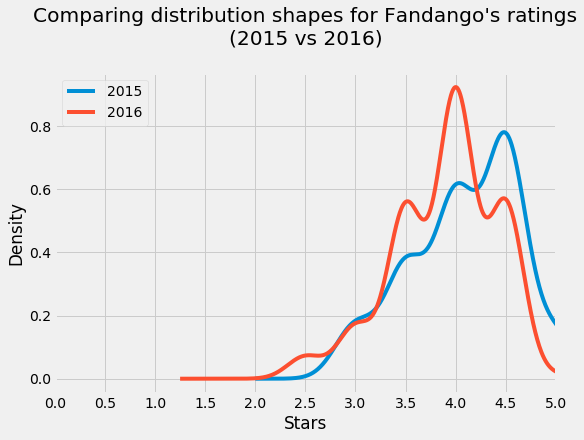

In [16]:
import matplotlib.pyplot as plt
from numpy import arange
%matplotlib inline
plt.style.use('fivethirtyeight') #optional styling

new_fandango15['Fandango_Stars'].plot.kde(label = '2015', legend = True, figsize = (8,5.5))
new_fandango16['fandango'].plot.kde(label = '2016', legend = True)

plt.title("Comparing distribution shapes for Fandango's ratings\n(2015 vs 2016)",
          y = 1.07) # the `y` parameter(increase font-size) pads the title upward
plt.xlabel('Stars')
plt.xlim(0,5) # because ratings start at 0 and end at 5
plt.xticks(arange(0,5.1,.5)) #The tick labels of the x-axis are:
#[0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0].
plt.show()

Analyzing the kernel density plots from above, I can noticed the following for each distribution:
- Both distributions seem to normal distribution but both skewed to the right, meaning that most of the movies in the sample have high ratings.
- Movies from 2015 have a least rating of 2.5 stars and those of 2016 have a least rating of 2 stars, and the movies from 2015 have higher max ratings. 
- With this I can tell that there is evidence that suggests that there is indeed a change between fandango's ratings for popular in 2015 and fandango's ratings for popular movies in 2016.
- Those in 2015 are higher than those in 2016.

### Comparing Relative Frequencies
The Kernel density plots from above showed that there's a clear difference betwwen the two distributions. But we need to analyse more granular information. So to do this I will examine the frequency distribution tables of the two samples

In [17]:
# Examining the frequency distribution of dataset 1
# It will be better to use relative frequencies to get a better understanding

new_fandango15['Fandango_Stars'].value_counts().sort_index(ascending = False)/len(new_fandango15['Fandango_Stars']) *(100)

5.0     6.976744
4.5    37.984496
4.0    28.682171
3.5    17.829457
3.0     8.527132
Name: Fandango_Stars, dtype: float64

In [18]:
# Examining the frequency distribution of dataset 2

new_fandango16['fandango'].value_counts().sort_index(ascending = False)/len(new_fandango16['fandango'])*100
#why didn't just use 'normalize' instead of having to divide by the length?

5.0     0.523560
4.5    24.607330
4.0    40.314136
3.5    24.083770
3.0     7.329843
2.5     3.141361
Name: fandango, dtype: float64

From a more granular analysis we can see that the percentage of movies with ratings 4.0 and above have reduced in the 2016 sample of movies.

Computing the mean, median and mode of the each distribution is another way of comparing both distibutions.


In [19]:
# Computing the mean, mode, and median of dataset 1

mean15 = new_fandango15['Fandango_Stars'].mean()

mode15 = new_fandango15['Fandango_Stars'].mode()

median15 = new_fandango15['Fandango_Stars'].median()

In [20]:
# Computing the mean, mode and median of dataset 2


mean16 = new_fandango16['fandango'].mean()

mode16 = new_fandango16['fandango'].mode()

median16 = new_fandango16['fandango'].median()


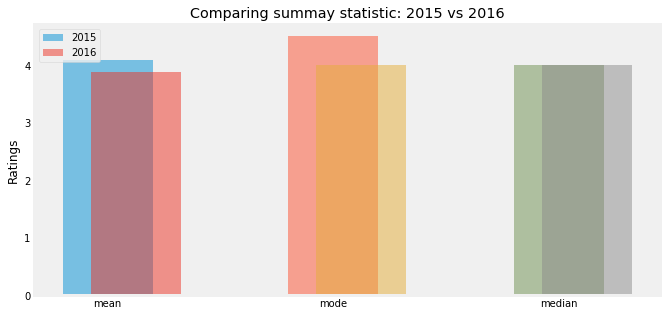

In [21]:
# Setting the positions and width for the bars
width = 0.25

#plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create the bar chart

plt.bar(1,mean15,alpha = 0.5,label='mean')
plt.bar([1+width], mean16, alpha = 0.5,color= '#EE3224', label = 'mean')

plt.bar(3,mode15, alpha = 0.5,label='mode')
plt .bar([3+ width], mode16, alpha = 0.5, label = 'mode')

plt.bar(5, median15, alpha = 0.5, label='median')
plt.bar([5 + width], median16, alpha = 0.5, label = 'median')

# Set the y axis labels
ax.set_ylabel('Ratings')

# Set the charts title
ax.set_title('Comparing summay statistic: 2015 vs 2016')

# Set the x axis labels
name = ['mean','mode', 'median']
plt.xticks([1,3,5])
ax.set_xticklabels(name)

# Adding legend

plt.legend(['2015','2016'], loc='upper left')
plt.grid()
plt.show()


I am still having difficulties with this plotting, I will read up on it. Kindly help correct this \

The difference between both years is little but considerable.

********************************************************************************************
<b>DO your best to make use of variable names. what you did above, could have been better and readable this way.</b>



In [23]:
print('2015' + '\n' + '-' * 16)
new_fandango15['Fandango_Stars'].value_counts(normalize = True).sort_index() * 100

print('2016' + '\n' + '-' * 16)
new_fandango16['fandango'].value_counts(normalize = True).sort_index() * 100

mean_2015 = new_fandango15['Fandango_Stars'].mean()
mean_2016 = new_fandango16['fandango'].mean()


median_2015 = new_fandango15['Fandango_Stars'].median()
median_2016 = new_fandango16['fandango'].median()


#output here is somewhat different, include the index.
mode_2015 = new_fandango15['Fandango_Stars'].mode()[0]
mode_2016 = new_fandango16['fandango'].mode()[0]

summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

2015
----------------
2016
----------------


,2015,2016
mean,4.085271,3.887435
median,4.000000,4.000000
mode,4.500000,4.000000


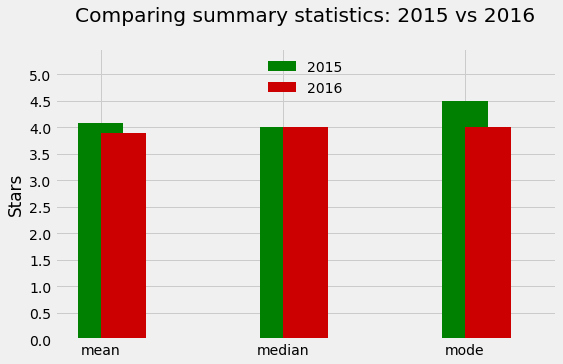

In [24]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = '#008000', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = '#CC0000', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()